# Importar librerias

In [1]:
#importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import datetime as dt
import scipy.stats as stats 
import seaborn as sns

# Cargar los datos

In [2]:
#Cargar los datos
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=";") #especificamos ";" como separador
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")

# Visualizar y procesar los datos 

# hypotheses 

In [3]:
#visualizar el df
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Procesaremos las columnas y las convertiremos a minuscula en primera instancia
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Solamente tuvimos que especificar el separador a ";" y transformar las mayusculas a minusculas para dejar listo el df para su uso.

# orders

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
#cambiamos el nombre de las columnas que no cumplen con el metodo "snake_case"
new_columns ={
    "transactionId":"transaction_id",
    "visitorId":"visitor_id"
    }
orders.rename(columns = new_columns, inplace = True)
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [7]:
#Cambiamos el tipo de datos de las columnas, en este caso a las fechas pasarle a datatime
#orders["date"] = pd.to_datetime(orders["date"])
#Le aplicaremos un trato especial en este caso con lambda le aplicaremos 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
#verificamos si hay datos duplicados
orders.duplicated().sum()

0

Hemos podido procesar los datos de este df, como corregir las columnas con fechas a datatime, cambiar nombres para que se ajusten al metodo "snake_case", tambien pudimos verificar que no hay datos ausentes ni duplicados explicitos.

# visits

In [10]:
#Vemos la informacion de df_visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
#Cambiamos el tipo de datos de la columna con fechas a datatime
#df_visits["date"] = pd.to_datetime(df_visits["date"], format= "%Y-%m-%d")
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visits.duplicated().sum()

0

Procesamos de la siguente manera: solamente cambiamos las fechas a datatime y verificamos que no hayan duplicados.

# Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Las ordenaremos en orden descendente de prioridad.

In [13]:
#Primero que nada visualizaremos el dataframe con las hipotesis 
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [14]:
#aplicamos el framework ICE para ver cual hipotesis priorizar y creamos una nueva columna para almacenar el resultado
hypotheses["ICE"] = (hypotheses["impact"] * hypotheses["confidence"]) / hypotheses["effort"]

print(hypotheses[["hypothesis","ICE"]].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


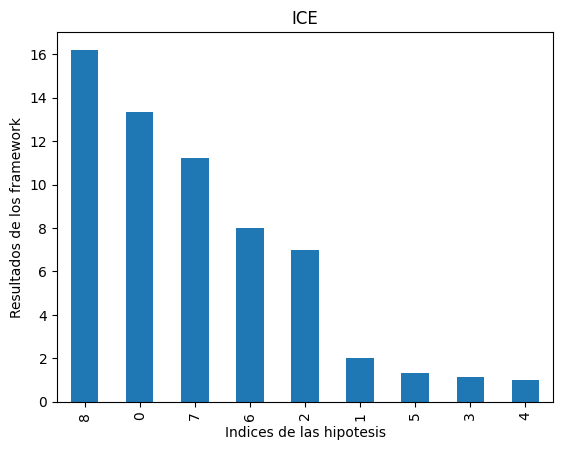

In [15]:
#Ahora graficaremos el resultado de ICE
hypotheses[["hypothesis","ICE"]].sort_values(by='ICE', ascending=False).plot(kind="bar",
                                                                                  title="ICE",
                                                                                  ylabel="Resultados de los framework",
                                                                                  xlabel="Indices de las hipotesis",
                                                                                  legend=False
                                                                                  )
plt.show()

En primera instancia los resultados de ICE nos dieron:
* 1er lugar la hipotesis de indice 8 con 16.2
* 2do lugar la hipotesis de indice 0 con 13.3
* 3er lugar indice 7 con 11.2
* 4ta lugar indice 6 con 8
* 5ta lugar indice 2 con 7
Esas son las hipotesis con valores ICE mas altas, las otras no las considerare ya que son muy bajos los valores.

### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [16]:
#aplicamos el framework RICE para ver cual hipotesis priorizar y creamos una nueva columna para almacenar el resultado
hypotheses["RICE"] = (hypotheses["reach"] * hypotheses["impact"] * hypotheses["confidence"])/ hypotheses["effort"]

print(hypotheses[["hypothesis","RICE"]].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


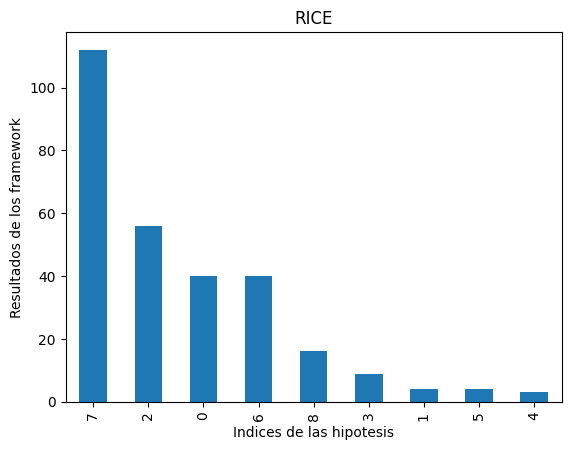

In [17]:
#Ahora graficaremos el resultado de RICE
hypotheses[["hypothesis","RICE"]].sort_values(by='RICE', ascending=False).plot(kind="bar",
                                                                                  title="RICE",
                                                                                  ylabel="Resultados de los framework",
                                                                                  xlabel="Indices de las hipotesis",
                                                                                  legend=False
                                                                                  )
plt.show()

Podemos ver como varian los resultados de RICE con los de ICE.

En primera instancia los resultados de RICE nos dieron:
* 1er lugar la hipotesis de indice 7 con 112
* 2do lugar la hipotesis de indice 2 con 56
* 3er lugar indice 0 con 40
* 4ta lugar indice 6 con 40
* 5ta lugar indice 8 con 16.2
Esas son las hipotesis con valores RICE mas altas, las otras no las considerare ya que son muy bajos los valores.

### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

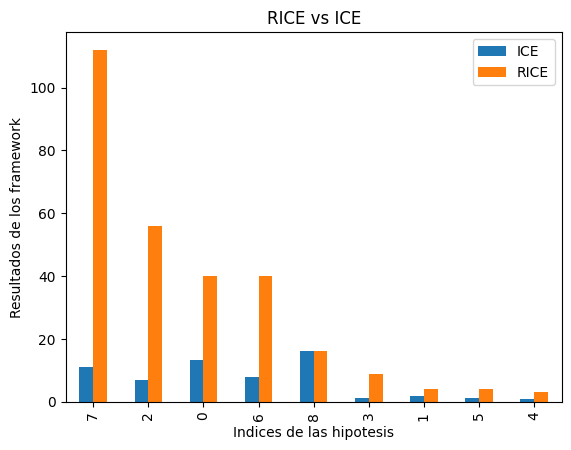

In [18]:
hypotheses[["hypothesis","ICE","RICE"]].sort_values(by='RICE', ascending=False).plot(kind="bar",
                                                                                       title="RICE vs ICE",
                                                                                       ylabel="Resultados de los framework",
                                                                                       xlabel="Indices de las hipotesis" 
                                                                                       )

plt.show()

El ICE y el RICE son bastante similares en su base, pero tienen una gran diferencia y en sus nombres se puede dilucidar. El ICE = Impact, Confidence, Ease. nos da el resultado de la interaccion entre estos parametros, pero el RICE incluye el parámetro "Reach" (alcance), que en este caso la hipotesis de indice 7 tiene un alcance de 10 puntos(el maximo en esta escala). las variantes entre el ICE y el RICE se deben basicamente por el parámetro Reach.

# Análisis del test A/B

## Analisis del test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

Para llevar a cabo esto y trazar los graficos, tenemos que recopilar datos acumulados. Vamos a declalar un DataFrame llamado "cumulativeData" con las columnas necesarias, sacadas de los DataFrames que tenemos "orders" y "visits". Sera un proceso con varios pasos en el cual usaremos variables de apoyo como por ejemplo "datesGroups"

In [19]:
#Aqui crearemos un DataFrame llamado datesGroups con parejas de valores únicos de 'date' y 'group' de la tabla orders
#Elimiaremos los valores duplicados con el método drop_duplicates().
#Con esto facilitaremos acumular los datos por dia
datesGroups = orders[['date', 'group']].drop_duplicates()

Declaramos la variable ordersAggregated para almacenar:

* la fecha;
* el grupo de la prueba A/B;
* el número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida;
* el número de usuarios distintos en el grupo de prueba que realizan al menos un pedido hasta la fecha especificada incluida;
* los ingresos totales de pedidos en el grupo de prueba hasta la fecha especificada incluida.

In [20]:
#Declaramos la variable "ordersAggregated"
ordersAggregated = datesGroups.apply(lambda x: orders[
        np.logical_and( #aplicamos "np.logical_and" que es útil para elegir un subconjunto de filas de una tabla que coincida con varias condiciones. 
            orders['date'] <= x['date'], orders['group'] == x['group'])].agg({ #obtendremos las filas de la tabla orders donde la fecha es menor o igual que la fecha del elemento datesGroups y el grupo de prueba es el mismo que en datesGroups
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',}),
    axis=1, #Aqui el axis 1 hace que el codigo se aplique a las filas
).sort_values(by=['date', 'group']) #ordenamos por las columnas "date" y "group" en orden ascendente

En la siguente celda declararemos la variable "visitorsAggregated" para almacenar:

* la fecha;
* el grupo de la prueba A/B;
* el número de pedidos distintos para el grupo de prueba hasta la fecha especificada incluida.

In [21]:
#Ahora declararemos la variable "visitorsAggregated" (de una forma muy similar a "ordersAggregated")
visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Ahora unimos ambas tablas "ordersAggregated" y "visitorsAggregated" en la variable "cumulativeData" por las columnas 'date' y 'group' con el método merge().

In [22]:
#Definimos "cumulativeData" 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [23]:
#vizualizamos los datos
print(cumulativeData.head())

        date group  transaction_id  visitor_id  revenue  visits
0 2019-08-01     A              24          20   2356.8     719
1 2019-08-01     B              21          20   1620.0     713
2 2019-08-02     A              44          38   3860.3    1338
3 2019-08-02     B              45          43   4243.8    1294
4 2019-08-03     A              68          62   5675.5    1845


In [24]:
#Cambiamos el nombre de las columnas resultantes para que sean mas descriptivas
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


Finalizando el procedimiento para obtener un DataFrame con los datos acumulados por dia podremos responder a la pregunta en cuestion:
"Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas."

In [25]:
#Para representar esta pregunta graficamente separaremos en una variable los datos necesarios de cada grupo
#Aqui los del grupo A:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
#Aqui los del grupo B:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]                 

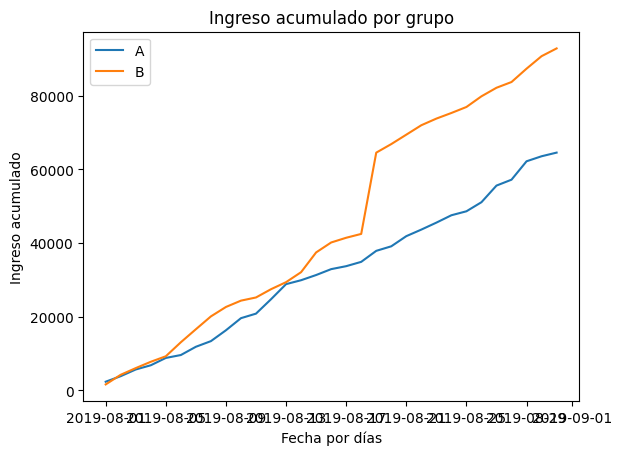

In [26]:
#Ahora crearemos el grafico para ver el ingreso acumulado por grupo
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("Ingreso acumulado por grupo")
plt.ylabel("Ingreso acumulado")
plt.xlabel("Fecha por días")
plt.legend()

plt.show()

Conclusiones: Podemos ver que el grupo B a llevado la delantera en cuanto a ingresos acumulados y con los días se ha incrementado la diferencia. Por otro lado tambien es bueno ver como el grupo A tambien aumenta sus ingresos acumulados a diario, es sin duda bueno para la empresa. Este grafico de ingresos acumulados nos podria dar indicios de que el grupo B podria ser mejor, pero aun nos faltan varias metricas y datos que consultar para esto.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

Con los datos que obtuvimos podemos ver rapidamente el grafico para ver el tamaño de pedido promedio acumulado por grupo. Usando las variables que creamos "cumulativeRevenueA" y "cumulativeRevenueB" con sus columnas y las operaciones respectivas.

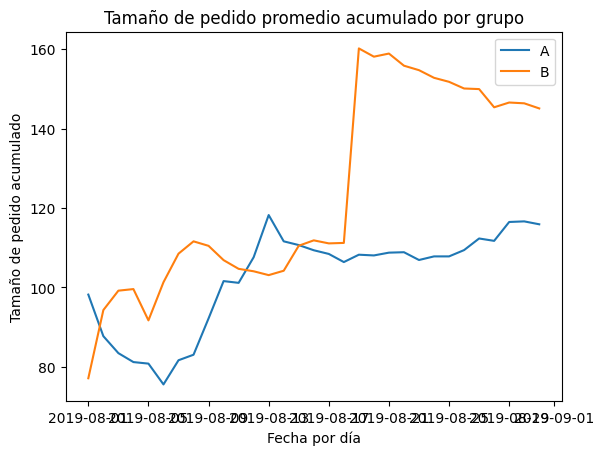

In [27]:
#Creamos el grafico
#Graficamos el grupo A
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],label='A',)
#Graficamos el grupo B
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],label='B',)
plt.title("Tamaño de pedido promedio acumulado por grupo")
plt.xlabel("Fecha por día")
plt.ylabel("Tamaño de pedido acumulado")
plt.legend()

plt.show()

Conclusiones: Podemos ver que el tamaño de pedido acumulado en promedio del grupo B tambien es mayor que el del grupo A. Al principio fue flucuando entre el grupo A y el grupo B pero desde mitad de mes aproximadamente el grupo B dio un salto considerable y se estabilizo con tendencia a la baja, en cambio el grupo A no dio este salto pero se estabilizo con tendencia a la subida. A pesar de esto al grupo B se le ve considerablemente mas arriba. Lo que nos podria sugerir esto es que el tamaño de pedido prmoedio acumulado del grupo B es considerablemente mejor.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

Aqui uniremos con merge() las variables "cumulativeRevenueA" y "cumulativeRevenueB" para que la tabla resultante contenga las columnas 'date', 'revenueA', 'revenueB', 'ordersA', 'ordersB'. La guardaremos en la variable "mergedCumulativeRevenue".

In [28]:
#Aplicamos el metodo merge() como describimos
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],)

In [29]:
#Visualizamos el Dataframe resultante
print(mergedCumulativeRevenue.head())

        date  revenueA  ordersA  revenueB  ordersB
0 2019-08-01    2356.8       24    1620.0       21
1 2019-08-02    3860.3       44    4243.8       45
2 2019-08-03    5675.5       68    6050.6       61
3 2019-08-04    6822.1       84    7767.9       78
4 2019-08-05    8810.2      109    9262.9      101


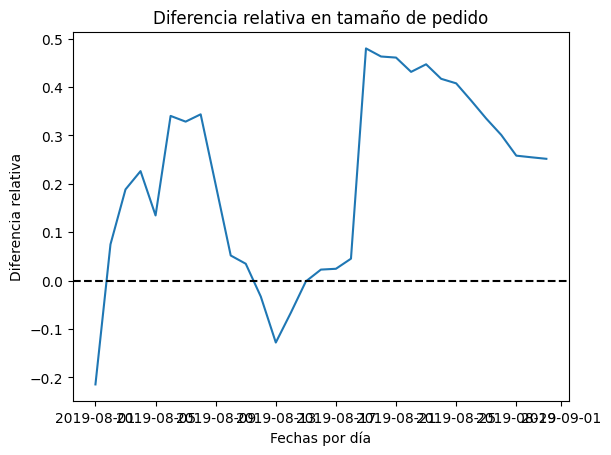

In [30]:
#Grafiquemos la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.
plt.plot(
mergedCumulativeRevenue['date'],
(mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/ mergedCumulativeRevenue['ordersA'])- 1,)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Diferencia relativa en tamaño de pedido")
plt.xlabel("Fechas por día")
plt.ylabel("Diferencia relativa")


plt.show()

Conclusiones: En este grafico de diferencia relativa podemos ver que hubieron varios cambios repentinos y considerables. Un gran salto en el grupo B que se dio pasados de mitad del mes, aunque previamente igual existieron picos altos, el que se dio despues de mitad de mes fue superior con creces. Tal vez tengan que ver con compras anormalmente grandes. Mas adelante lo podremos confirmar. 

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

Para calcular la tasa de conversion primero crearemos una columna al df "cumulativeData" en el cual tenemos los datos acumulados por dia de ambos grupos.

In [31]:
#Creamos la columna "conversion" en el df "cumulativeData"
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])

In [32]:
#veamos como luce la nueva columna en el df "cumulativeData"
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      24      20   2356.8       719    0.033380
1 2019-08-01     B      21      20   1620.0       713    0.029453
2 2019-08-02     A      44      38   3860.3      1338    0.032885
3 2019-08-02     B      45      43   4243.8      1294    0.034776
4 2019-08-03     A      68      62   5675.5      1845    0.036856


Ahora seleccionaremos los grupos A y B y los almacenaremos en variables diferentes "cumulativeDataA" y "cumulativeDataB"

In [33]:
#Almacenamos los del grupo A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
#Almacenamos los del grupo B  
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

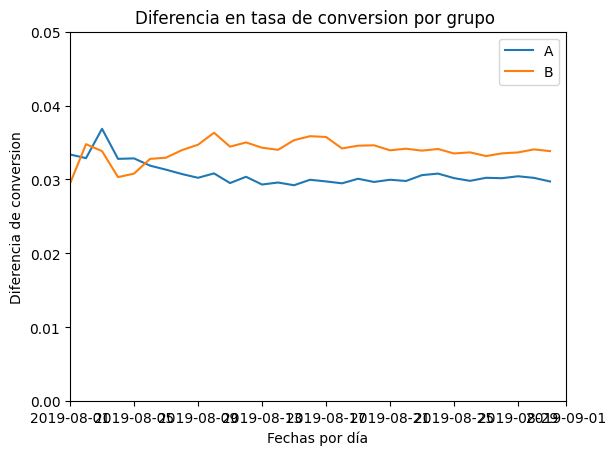

In [34]:
#Ahora grafiquemos ordenando los datos respectivamente
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])
plt.title("Diferencia en tasa de conversion por grupo ")
plt.xlabel("Fechas por día")
plt.ylabel("Diferencia de conversion")
plt.legend()

plt.show()

Conclusion: Podemos ver como al inicio de la prueba, el segmento A tenía una tasa de conversión más alta, pero el segmento B ganó gradualmente y se estabilizó en un valor casi constante. A demas podemos ver que al igual que en las otras metricas ya calculadas, en la conversion nuevamente el grupo B le saca ventaja al grupo A.  

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

Usaremos el Dataframe "orders" que contiene la informacion necesaria para llevar a cabo el grafico de dispersion solicitado.
Primero haremos un groupby para obtener las columnas que necesitamos "visitor_id"(que contiene identificador del usuario que realizó el pedido) en la cual especificamos con "as_index=False" que no queremos que sea el indice del pd.series y agregamos la columna "transaction_id" (que contiene el identificador de pedido) y le aplicamos "pd.Series.nunique" ya que queremos los pedidos unicos por usuario.

In [35]:
#Aplicamos el groupby descrito y la almacenamos en la variable "ordersByUsers"
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
#visualizamos el groupby obtenido
print(ordersByUsers.head())              

   visitor_id  transaction_id
0     5114589               1
1     6958315               1
2     8300375               2
3    11685486               1
4    39475350               1


In [36]:
#ajustamos el nombre de las columnas
ordersByUsers.columns = ['user_id', 'orders']
#Y visualizamos los resultados ordenados de forma descendente 
print(ordersByUsers.sort_values(by='orders', ascending=False).head())

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


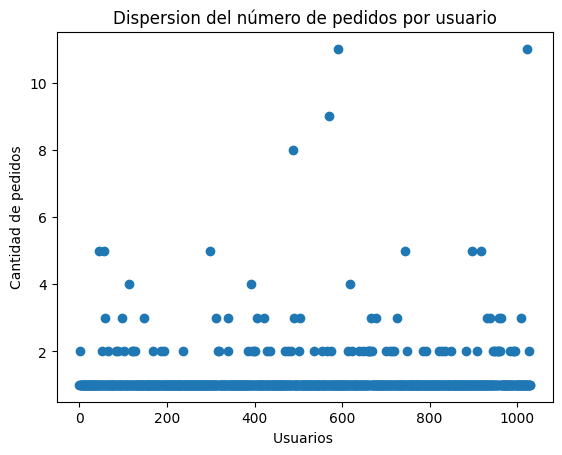

In [37]:
#Graficamos los resultados
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Dispersion del número de pedidos por usuario")
plt.ylabel("Cantidad de pedidos")
plt.xlabel("Usuarios ")

plt.show()

Conclusion: Podemos concluir viendo el grafico de dispersion que hay muy pocos usuarios con mas de 2 pedidos y solo vemos dos casos con 11 compras, lo cual es bastante. Estos casos también pueden resultar ser anomalías. En los siguentes hallasgos podremos obtener mas informacion a cerca de las anomalias para poder concluir de mejor forma los datos que estamos viendo.

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

el método percentil() de NumPy para obtener el 95% y el 99%

In [38]:
#aplicamos el metodo descrito()
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Conclusion: Aquí podemos ver que hasta el percetil 95% pertenecen a 2 pedidos por usuario, por lo cual alli estableceremos el limite, todos los usuarios que pidan mas de 2 productos se consideraran anomalos.

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

Aqui el metodo es algo mas facil, ya que siquiera es necesario usar groupby a diferencia del ejercicio anterior.
Usamos el df "orders" y ordenamos en base a "revenue". Luego realizamos el grafico de dispersion como hemos aprendido.

In [39]:
#visualizar la tabla ordenada en forma descendente para ver los mayores valores de ingresos primero  
print(orders.sort_values(by='revenue',ascending=False).head())

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
1196      3936777065  2108080724 2019-08-15   3120.1     B
858        192721366  1316129916 2019-08-27   1450.2     A
1136       666610489  1307669133 2019-08-13   1425.8     A
744       3668308183   888512513 2019-08-27   1335.6     B


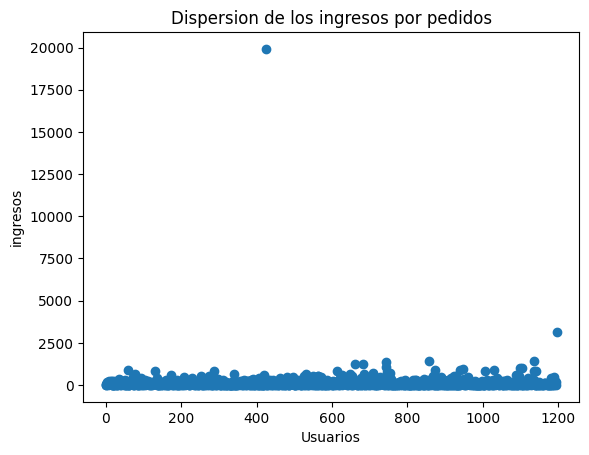

In [40]:
#Graficamos
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Dispersion de los ingresos por pedidos")
plt.xlabel("Usuarios")
plt.ylabel("ingresos")

plt.show()

Conclusion: Podemos ver que hay pocos ingresos atipicos pero si son muy pronunciados. Podemos ver que no hay muchos pedidos con ingresos arriba de 1000. Hay alrrededor de solo diez pedidos con ingresos mayores arriba de 1000. A continuacion veremos el porcentaje de los valorea tipicos y evaluaremos que hacer al respecto. 

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

el método percentil() de NumPy para obtener el 95% y el 99%

In [41]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Conclusion: Aqui definiremos el punto de anomalia desde el percentil 95% (ingreso de 435.54 por pedido).

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Crearemos las variables "ordersByUsersA" y "ordersByUsersB" para almacenar las columnas 'user_id', 'orders'. Para los usuarios con al menos un pedido, indicaremos el número de pedidos realizados. 

In [42]:
#Ejecutamos el groupby como acabamos de describir
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

Ahora declararemos las variables sampleA y sampleB con usuarios de diferentes grupos y números de pedidos correspondientes. Los que no pidieron nada tendrán un 0. Esto es necesario para preparar las muestras para la prueba de Mann-Whitney. 

Concatenaremos la lista del número de pedidos de cada usuario: ordersByUsersA['orders'] con ceros para los usuarios que no pidieron nada. Su número es la diferencia entre el número total de visitantes y el número de registros en los pedidos: visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders']). Lo mismo para sampleB. Hacemos un incapie para axis=0 (significa que opera a nivel de filas)

In [43]:
#Aplicamos lo dicho previamente
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,
            index=np.arange(visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

In [44]:
#Aplicamos lo dicho previamente
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,
            index=np.arange(visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])),name='orders',),], axis=0,)

In [45]:
#Imprimiremos el valor p para comparar la conversión de los grupos. Redondearemos a tres decimales. 
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#Imprimiremos la diferencia relativa en la conversión entre los grupos. Redondearemos a tres decimales.
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Conclusion: el valor p es menor que 0.05 por lo que rechazamos la hipótesis nula(Esta es de que ambas muestras son iguales). El análisis de datos sin procesar mostró que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas.
La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 13.8%. 

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Para calcular la importancia estadística de la diferencia en el tamaño medio de los pedidos de los segmentos, pasaremos los datos sobre los ingresos al criterio mannwhitneyu()

In [46]:
print('{0:.3f}'.format(stats.mannwhitneyu(
orders[orders['group'] == 'A']['revenue'],
orders[orders['group'] == 'B']['revenue'],)[1]))
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/ orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.692
0.252


El valor p es muy superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. No obstante, el tamaño de pedido promedio para el grupo B es mayor que para el grupo A.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Ahora crearemos dos variables para almacenar los datos que consideramos anomalos y asi filtrar los datos originales.
Usamos el criterio del percentil 95% para ambas pruebas.

In [47]:
#En esta variable almacenaremos a los usuarios con muchos pedidos
#Todos los usuarios con pedidos mayores a 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']], axis = 0)
#Aqui almacenaremos a usuarios con pedidos caros
#ingresos mayores que 435.54
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitor_id']
#En "abnormalUsers" almacenaremos ambas listas
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


En total hay 74 filas con datos anomalos. Ya con esto podemos filtrar los datos.

In [48]:
#Filtramos por grupo A
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].
                             sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [49]:
#Filtramos por grupo B
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].
                             sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [50]:
#Apliquemos el criterio estadístico de Mann-Whitney a las muestras resultantes:
#Imprimiremos el valor p para comparar la conversión de los grupos. Redondearemos a tres decimales.
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#Imprimiremos la diferencia relativa en la conversión entre los grupos. Redondearemos a tres decimales.
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Conclusion: Cambiaron algo los numeros pero no vario mucho que digamos. Igual que con los datos sin procesar, hemos alcanzado el nivel de significación. El segmento B es mejor que el segmento A.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Aqui es algo mas rapido que el ejercicio pasado ya que gracias a las variables que creamos podemos pasar directamente al codigo para obtener el resultado deseado.

In [51]:
#Muestra el valor p calculado con la prueba U de Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',  # Selecciona datos en el grupo A
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo A
    orders[np.logical_and(
        orders['group']=='B',  # Selecciona datos en el grupo B
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo B
)[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B',  # Selecciona datos en el grupo B
           np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() /  # Calcula el ingreso medio para el grupo B
    orders[np.logical_and(orders['group']=='A',  # Selecciona datos en el grupo A
           np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.788
-0.019


Conclusion: llama la atencion pero: ¡Esta vez obtuvimos una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos!.
El valor p sigue por encima del 0.05 lo que no podemos rechazar la hipotesis nula(que no hay grandes diferencias esstadisticas significativas entre los tamaños de pedidos promedio de los grupos).
Por otro lado las diferencias indican que eliminar los valores atípicos disminuyó la cantidad de ruido en los datos: la varianza disminuyó.
Ahora los ingresos del grupo A son 1,9% mayores que el grupo B. 

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Mi decision es la opcion 1: Parar la prueba, considerar a uno de los grupos como líder en este caso el grupo B.
¿Porque esa decision?
* Porque los datos abalan que el grupo B es mas consistente en general:
- En cuanto ingresos acumulado el grupo B se muestra mejor y mas solidos que el grupo A.
- En cuanto al tamaño de pedido promedio acumulado por grupo, el grupo B tambien se ve mejor.
- En cuanto a conversion se ve mejor tambien el grupo B.
- En las significancia estadística se le ve mejor tambien al grupo B.
- A medida que los datos fluctuaban y se estabilizaban por lo general el grupo B se mostraba mas solido que el grupo A.
* En defensa de el grupo A:
- En general tambien tenia un alza en los datos realizados, como por ejemplo en los ingresos, en el tamaño de pedidos.
- Cuando filtramos los datos atipicos se pudo ver mejor al grupo A respecto a con los datos en bruto.

